# Comparison of different model and observation-based products for air-sea CO$_2$ fluxes and air and sea pCO$_2$ concentrations. 

# Abstract: 
The ocean is a significant sink for atmospheric carbon dioxide, and has absorbed approximately a quarter of all anthropogenic carbon dioxide emissions since the pre-industrial (Friedlingstein et al., 2023). Many model and observation data products have been developed to assess the spatiotemporal variability of the ocean carbon sink, using different techniques and methods to overcome limitations related to the resolution of available data and our current understanding of less well studied regions, such as the Southern Ocean, and dynamic coastal regions (Fay et al., 2021). Understanding the current ocean carbon state and how it has behaved through time is crucial for predicting how the ocean will respond to increasing anthropogenic carbon dioxide emissions (Friedlingstein et al., 2023; Fay et al., 2024). Here two, similar, observation-based data products are compared to assess how well they compare seasonally and spatially. The product fluxes were expected to differ based on the methods and techniques applied in each product. Additionally, a very simple 0-D model of air-sea CO2 flux is implemented and broadly compared to the two observation-based products. {To add: statistical tests that were conducted, results, and concluding sentence}



# Introduction:

The observed increase in the concentration of atmospheric CO2 since 1750, as a combined result of land-use changes and fossil fuel consumption, has significantly altered the global carbon cycle, leading to changes in Earth’s climate (Takahashi et al., 2009). The ocean is a significant carbon sink and is responsible for absorbing approximately 26% of total anthropogenic CO2 emissions since the pre-industrial, acting as a critical climate mitigator (Friedlingstein et al., 2023).  

The ocean absorbs carbon primarily through air-sea interactions, with atmospheric CO2 reacting directly with seawater to form carbonic acid, which rapidly dissociates, in a two-step process to reach thermodynamic equilibrium, to form bicarbonate, carbonate, and hydrogen ions. The air-sea exchange of CO2, or the flux of CO2, is primarily controlled by the difference in the partial pressure (ΔpCO2), of the atmosphere and the surface ocean, as well as the gas exchange coefficient. The gas transfer coefficient is the product of the gas transfer velocity, a power function of the wind speed at a given temperature and salinity, and the solubility of CO2 in seawater, also at a given temperature and salinity.  

Many studies have worked to develop models and products to assess the air-sea flux of CO2 across the global ocean (Fay et al., 2021). However, despite significant progress over the past 50 years, significant gaps remain with respect to the ocean pCO2 observing capacity required to capture air-sea flux variability across all spatiotemporal scales. Additionally, differences in how the gas transfer exchange coefficient is parameterized contribute to significant variability across model and observation products (Takahashi et al., 2009).  

The air-sea CO2 flux reflects the exchange of carbon between the atmosphere and the surface ocean, providing key information about the magnitude, and distribution of ocean carbon sources and sinks. Exploring the processes and mechanisms that contribute to the spatiotemporal variability of air-sea CO2 fluxes is crucial for understanding how the ocean will respond to future, anticipated climate (Shi et al., 2024; Valsala et al., 2012).  

For my final project I first implemented a simple 0-D model of air-sea CO2 fluxes to explore the ability of a simple model to reproduce flux variability observed across ocean regions. Due to a lack of available data, I was not able to assess this model in detail. I then compared two global monthly gridded sea surface pCO2 and air-sea CO2 flux products, one from 1982-2023  developed by Landschützer et al., (2022), and one from 1982 to 2022, developed by Bennington et al. (2022). I wanted to explore how well these two products directly compared seasonally and spatially. My research questions were 2-fold, first how well can a simple 0-D model reproduce global spatial and annual temporal variability in air-sea CO2 fluxes? And second, how well do the above two observation-based data products compare seasonally and spatially over the period of 1985 to 2021. I predict that the 0-D model will capture variability well in regions where flux variability is primarily driven by ocean circulation changes, but poorly in regions where flux variability is driven primarily by biology. Regarding the observation data product comparison, I predict that both will capture the same general trends, but that based on methodology likely perform differently in different ocean regions. 


# Data and Methods:  
## 0-D air-sea CO2 flux model description:
The 0-D air-sea CO2 flux model was developed using the broad model structure we first implemented in class in the 0-D EDM model. To aid the model, additional functions were created which are detailed below. These functions include conversion functions, to convert between wind speed, temperature, and pCO2 inputs of different units. The code box below the conversion functions contains the functions used to compute the Schmidt number, a parameter required to calculate the gas transfer coefficient, which depends on sea surface temperature (sst). These functions also include a function to compute the gas transfer coefficient, which depends on wind speed (u10) and sst. As well as the function to calculate CO2 solubility in seawater, which depens on sst and sea surface salinity (sss). The final function of this block computes the air-sea co2 flux, a function of sst, u10, sss, and the atmospheric and sea surface pCO2 values.  

The 0-D model takins in parameters t_max (max run time for model in seconds), dt (time step in seconds), u10 (wind speed), pCO2_atm_0 (initial atmospheric pCO2), pCO2_sea_0 (initial sea surface pCO2), temp_C (sea surface temperature), sal (sea surface salinity), and MLD (the surface layer mixed layer depth). The model provides insight into the time required for equilibration of the atmosphere and surface ocean given the initial conditions. The air-sea CO2 flux is thermodynamically controlled by the difference in pCO2 between the atmosphere and ocean, which is computed that each step. The model loops through each time step, until t_max is reached. At each timestep, the flux is computed, which is then used to calculate the atmospheric and surface ocean CO2 concentrations. These changes are added to the previous respective pCO2 values, and then appended to the respective arrays for pCO2_atm, pCO2_sea, and fluxes. The model returns the time array, atmospheric pCO2, sea surface pCO2, and air-sea CO2 fluxes computed by the model over time.

## Observation product comparison:
The observation-based product by Landschützer et al. (2022) was created by merging 2 publicly available pCO2 datasets of the global open ocean (Landschützer et. al 2016) and the coastal ocean (Laruelle et. al 2017). These products were both developed using a 2-step neural network technique. The final product is then produced by projecting driving variables (surface temperature, chlorophyll, mixed layer depth, and atmospheric CO2) onto oceanic pCO2, using non-linear relationships. The air-sea CO2 fluxes are computed from the air-sea CO2 partial pressure difference and a bulk gas transfer formulation following Landschützer et al. 2013. The monthly climatology is created from the monthly average of the period 1985-present. This product was downloaded from NOAA NCEI and the citation is provided with the dataset below.

The product by Bennington et al. (2022) builds upon the common approach to estimate global fCO2 by training a machine learning algorithm on available data, associated physical and biogeochemical observations, by adding improved connections between observations and internal processes. The approach applied in this product included the additional pre-processing of the fCO2 data to remove the direct effect of temperature, which enhances the biogeochemical/physical component of fCO2 in the fCO2-Residual. This product was downloaded from the LDEO website and the citation is provided with the dataset below.

Both datasets were transposed to ensure that the coordinates were the same: time, latitude, and longitude, and were sliced to ensure that the time ranged across the same period from 1985 to the end of 2021. These adjusted datasets were saved to new netCDF files, which are what was analyzed and plotted in the results.  

Statistical analyses:  
To compare the two observation products, the differences in the global fluxes was calculated, at each time step, latitude degree, and longitude degree by iteratively looping through each coordinate and calculating the difference in fluxes of both products. These differences were saved in a new array, which was saved as a netCDF, which loaded and used for plotting below to prevent time restraints. The code used to compute the difference is provided below for reference, but is commented out. To compare these differences, the grid correlation, spatial bias, standard deviation ratio, and centered RMSE were calculated. Histograms of the two product fluxes and seasonal distributions of the two products were also created. The results of these tests are explored in the results sections. 


### Imports

In [56]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## 0-D model of air-sea CO$_2$ exchange code and methods:

### Conversion functions

In [34]:
def mph_to_cmphr(u10_mph):
    '''
        Convert wind speed in mph to cm/hr
    Parameters
        u10_mph: wind speed in mph at 10m above sea surface
    Returns
        u10_cmphr: wind speed at 10m above sea surface in cm/hr
    '''
    return u10_mph * 160934.4 
    
def C_to_K(temp_C):
    '''
    Unit conversion of temp (deg C) to Kelvin
    Parameters
        temp_C: temperature in C
    Returns
        temp_K: temperature in Kelvin
    '''
    temp_K = temp_C + 273.15 # Units of K.
    return temp_K

def uatm_to_atm(pCO2_uatm):
    ''' 
    Convert pCO2 in uatm to pCO2 in atm
    Parameters:
        pCO2_uatm: pCO2 in uatm
    Returns:
        pCO2_atm: pCO2 in atm
    '''
    return pCO2_uatm/1.0e6

### Functions

In [33]:
# Function to compute Schmidt number from Wanninkohf et al. (1992)
def calc_Schmidt_number(temp_C):
    '''
    Calculates the Schmidt number (req. for calc of CO2 flux) as a function of temperature
        Parameters
            temp_C: temp of seawater (deg C)
        Returns
            Sc: the Schmidt number
    '''

    Sc =  (2073.1 - (125.62 * temp_C) + (3.6276 * temp_C ** 2) -
              (0.043219 * temp_C ** 3))  # Compute the Schmidt Number.
    return Sc

# Function to compute the gas transfer velocity (k)
def calc_k(u10, Sc):
    '''
    Calculates the gas transfer velocity in m/s as a function of wind speed and the Schmidt number
        Parameters
            Sc: the Schmidt number
            u10: wind speed at 10 m above the sea surface (cm/hr)
        Returns
            k: the gas transfer velocity (m/s)
    '''
    k = 0.27 * (u10 ** 2) * np.sqrt(Sc/660) # Compute gas transfer velocity in cm/hr.
    k = k / 360000  # Convert to m/s.
    return k

def calc_solubility(temp_C, sal):
    '''
    Calculate the solubility of seawater in mol kg-1 atm-1 from Weiss 1974
    Parameters
        temp_C: temperature in C of seawater
        sal: seawater salinity in PSU
    Returns
        K_0: solubility of seawater (mol kg^-1 atm^-1)
    '''
    tk = C_to_K(temp_C)
    K_0 = np.exp(-60.2409+(93.4517*(100/tk))+ 23.3585*(np.log(tk/100)) + sal*(0.023517-0.023517*(tk/100) + 0.0047036*((tk/100)**2)))
    return K_0 

def calc_co2_flux(u10,temp_C,sal,pCO2_air,pCO2_sea):
    '''
    Calculate the flux of CO2 across the air-sea interface (flux from air to sea is positive and flux from sea to air is negative)
    Parameters
        u10: wind speed at 10 m above the sea surface (cm/hr)
        temp_C: temperature in C of seawater
        sal: seawater salinity in PSU
        pCO2_air: pCO2 in air
        pCO2_sea: pCO2 in seawater at temp_C and sal conditions
    Returns
        flux: the air-sea flux of CO2 in mol per m^2 per s
    '''
    
    Sc = calc_Schmidt_number(temp_C) # calc schmidt number
    k = calc_k(u10, Sc) # calc the gas transfer velocity 
    K_0 = calc_solubility(temp_C, sal)
    delta_pco2 = uatm_to_atm(pCO2_air) - uatm_to_atm(pCO2_sea)  # Convert uatm to atm, calculate the difference air to sea
    
    flux = k * K_0 * (delta_pco2) # calculate the air-sea flux of CO2
    
    return flux # mol m^-2 s^-1

### Time-dependent model for air-sea CO2 exchange

In [40]:
def co2_exchange_box_model(t_max, dt, u10, pCO2_atm_0, pCO2_sea_0, temp_C, sal, MLD):
    '''
    Runs the 0-D model for air-sea CO2 flux until the air and sea surface reach equilibrium
    Parameters
        t_max: maximum time in seconds
        dt: time step in seconds
        u10: wind speed at 10 m above the sea surface (cm/hr)
        pCO2_atm_0: pCO2 in air initial
        pCO2_sea_0: initial pCO2 in seawater at temp_C and sal conditions
        temp_C: temperature in C of seawater
        sal: seawater salinity in PSU
        MLD: the mixed layer depth, the depth of the surface mixed layer of the ocean
    Returns
        t: the time array in seconds
        pCO2_atm: the atmospheric CO2 values over t
        pCO2_sea: the sea surface pCO2 values over t
        flux: the air-sea flux of CO2 in mol per m^2 per s
        temp_C: the temperature in C of seawater (constant)
        u10: the wind speed (constant)
    '''
    
    # Time array
    t = np.arange(0, t_max, dt)
    
    # Initialize concentrations over time
    pCO2_atm = np.zeros(len(t))
    pCO2_sea = np.zeros(len(t))
    fluxes = np.zeros(len(t))
    
    # Initial values
    pCO2_atm[0] = pCO2_atm_0
    pCO2_sea[0] = pCO2_sea_0
    fluxes[0] = calc_co2_flux(u10, temp_C, sal, pCO2_atm_0, pCO2_sea_0)
    
    # Loop over time to solve the system
    for i in range(1, len(t)):
        # Compute Schmidt number and gas transfer velocity
        Sc = calc_Schmidt_number(temp_C)
        
        # Calculate air-sea flux
        flux = calc_co2_flux(u10, temp_C, sal, pCO2_atm[i-1], pCO2_sea[i-1])
        
        # Update concentrations
        dC_ocean = flux * dt / MLD
        dC_atm = -flux * dt * total_ocean_surface_area / n_atm
        
        pCO2_ocean = dC_ocean*calc_solubility(temp_C,sal) 
        
        pCO2_sea[i] = pCO2_sea[i-1] + pCO2_ocean
        pCO2_atm[i] = pCO2_atm[i-1] + dC_atm
        fluxes[i] = flux
    
    return t, pCO2_atm, pCO2_sea, fluxes, temp_C, u10, MLD

## Observation product data and methods:

### 1. Gridded pCO2 dataset: an observation-based global monthly gridded sea surface pCO2 and air-sea CO2 flux product from 1982-2023 and its monthly climatology (NCEI Accession 0160558) 

CITATION: Jersild, Annika; Landschützer, Peter; Gruber, Nicolas; Bakker, Dorothee C. E. (2017). An observation-based global monthly gridded sea surface pCO2 and air-sea CO2 flux product from 1982 onward and its monthly climatology (NCEI Accession 0160558). [indicate subset used]. NOAA National Centers for Environmental Information. Dataset. https://doi.org/10.7289/v5z899n6. Accessed 5/28/25.

In [18]:
mpis = xr.open_dataset("C:/Users/annar/OneDrive/Documents/GitHub/ATM_521/Final project/data/pco2_MPI_SOM-FFN_v2023_NCEI_OCADS_final.nc")

### 2. Gridded fCO2 monthly data product from Bennington et al. (2022):

CITATION: Bennington, V., Galjanic, T., & McKinley, G. A. (2022). Explicit physical knowledge in machine learning for ocean carbon flux reconstruction: The pCO2-Residual method. Journal of Advances in Modeling Earth Systems, 14, e2021MS002960. https://doi. org/10.1029/2021MS002960

In [21]:
ldeo = xr.open_dataset("C:/Users/annar/OneDrive/Documents/GitHub/ATM_521/Final project/data/delta_pco2_LDEO-resid_1985-2021_final.nc")

### Compute difference:


In [25]:
# set flux variables for each dataset
mpis_flux = mpis.fgco2_smoothed
ldeo_flux = ldeo.fgco2_molm2yr

Code used to compute the difference:

% create an empty difference array
diff_data = np.empty_like(ldeo_flux.values)

% Iterate through the time, lat, and lon dimensions
for t in range(mpis_flux.sizes['time']):
    for i in range(mpis_flux.sizes['lat']):
        for j in range(mpis_flux.sizes['lon']):
            val1 = mpis_flux.values[t, i, j]
            val2 = ldeo_flux.values[t, i, j]
            # compute the flux difference 
            diff_data[t, i, j] = val1 - val2

% Wrap the difference back into an xarray
diff = xr.DataArray(
    diff_data,
    coords=mpis_flux.coords,
    dims=mpis_flux.dims,
    name="flux_difference"
)


In [28]:
# load the computed flux difference
diff_obs_fluxes = xr.open_dataset("data/obs_data_product_flux_difference.nc")

### Statistical analyses:

In [29]:
# correlation
grid_corr = xr.corr(mpis_flux, ldeo_flux, dim="time")

# spatial bias
spatial_bias = (mpis_flux - ldeo_flux).mean(dim="time")

# compute the standard deviation ratio
std_mpis = mpis_flux.std(dim="time")
std_ldeo = ldeo_flux.std(dim="time")
std_ratio = std_mpis /std_ldeo

# centered RMSE
centered_rmse = (((mpis_flux - mpis_flux.mean(dim="time")) - (ldeo_flux - ldeo_flux.mean(dim="time")))**2).mean(dim="time") ** 0.5

# Results

## 0-D air-sea flux model results

### Run the model for a set of TROPICAL-like conditions (high salinity, high temps, lower winds, shorter MLDs)

In [41]:
# set constants
total_ocean_surface_area = 361 * 10**6 * 10**6 # m ^ 2
n_atm = 1.78*10**20 # moles in atmosphere

# set time max and timestep
t_max =86400*10  # Time in seconds
dt = 0.01*86400 # Time step in seconds

# set initial conditions
pCO2_atm_0 = 430  # Initial atmospheric CO2 (uatm)
pCO2_sea_0 = [200,1000]   # Initial ocean CO2 concentration (uatm)
MLD = [50,150] # mixed layer depth in m
temp_C_w = [15,20] # Temperature in °C
u10_w = [mph_to_cmphr(5),mph_to_cmphr(15)] # wind speed in cm/hr
sal_w = 34 # salinity in PSU

# create output arrays
t_w_out = []
pCO2_atm_w_out = []
pCO2_sea_w_out = []
fluxes_w_out = []
u10_w_out = []
sst_w_out = []
mld_w_out = []

# iterate through different initial conditions and save outputs to arrays 
for i in np.arange(0,2):
    for j in np.arange(0,2):
        for k in np.arange(0,2):
            for l in np.arange(0,2):
                t_w_temp, pCO2_atm_w_temp, pCO2_sea_w_temp, fluxes_w_temp, sst_temp, u10_temp, mld_temp = co2_exchange_box_model(t_max, dt, u10_w[i], pCO2_atm_0, pCO2_sea_0[j], temp_C_w[k], sal_w, MLD[l])
                t_w_out.append(t_w_temp)
                pCO2_atm_w_out.append(pCO2_atm_w_temp)
                pCO2_sea_w_out.append(pCO2_sea_w_temp)
                fluxes_w_out.append(fluxes_w_temp)
                sst_w_out.append(sst_temp)
                u10_w_out.append(u10_temp)
                mld_w_out.append(mld_temp)

### Figure 1. Plot of 0-D air-sea CO2 flux model output for tropical-like conditions

Text(0.5, 0.98, 'Time-dependent CO2 Exchange at the Ocean Surface (tropical conditions)')

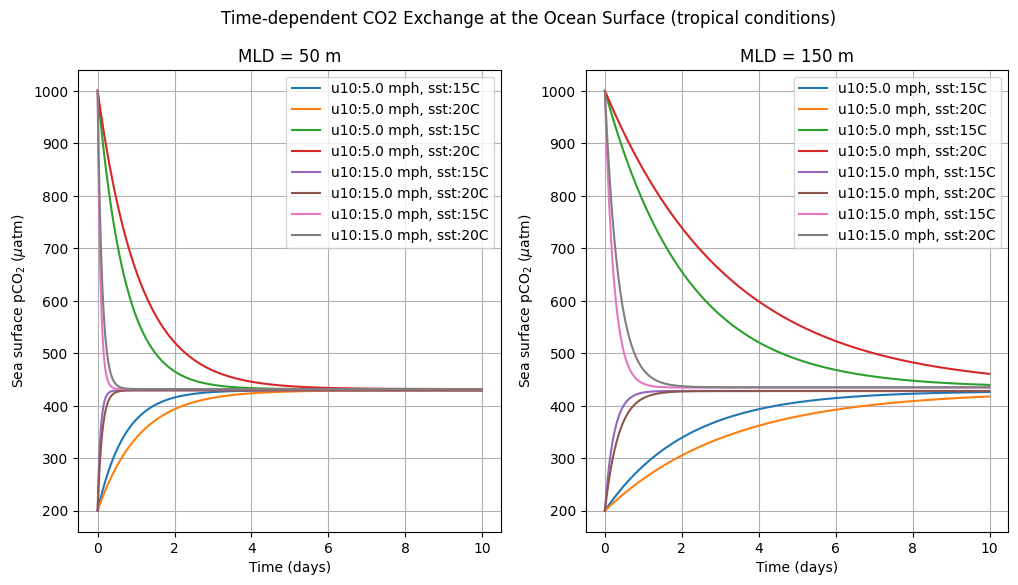

In [50]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

for i in np.arange(0,len(t_w_out)):
    if mld_w_out[i] == 50 :
        ax[0].plot(t_w_out[i]/86400, pCO2_sea_w_out[i], label='u10:'+str(u10_w_out[i]/160934.4)+' mph, sst:'+str(sst_w_out[i])+'C')
    else:
        ax[1].plot(t_w_out[i]/86400, pCO2_sea_w_out[i], label='u10:'+str(u10_w_out[i]/160934.4)+' mph, sst:'+str(sst_w_out[i])+'C')
        
ax[0].set_xlabel("Time (days)")
ax[0].set_ylabel("Sea surface pCO$_2$ ($\mu$atm)")
ax[0].set_title("MLD = 50 m")
ax[0].legend()
ax[0].grid(True)

ax[1].set_xlabel("Time (days)")
ax[1].set_ylabel("Sea surface pCO$_2$ ($\mu$atm)")
ax[1].set_title("MLD = 150 m")
ax[1].legend()
ax[1].grid(True)

fig.suptitle('Time-dependent CO2 Exchange at the Ocean Surface (tropical conditions)')

# Expect CO2 in the surface ocean to equilibrate over days to weeks ex. warm, salty tropical ocean with low winds - weeks; vs. windy cold, fresher arctic - days 

### run the model for a set of arctic-like conditions (lower salinity, lower temps, higher winds, taller MLDs)

In [51]:
# set constants
total_ocean_surface_area = 361 * 10**6 * 10**6 # m ^ 2
n_atm = 1.78*10**20 # moles in atmosphere

# set time max and timestep
t_max =86400*10  # Time in seconds
dt = 0.01*86400 # Time step in seconds

# set initial conditions
pCO2_atm_0 = 430  # Initial atmospheric CO2 (uatm)
pCO2_sea_0 = [100,600]   # Initial ocean CO2 concentration (uatm)
MLD = [100,200] # mixed layer depth in m
temp_C_c = [5,10] # Temperature in °C
u10_c = [mph_to_cmphr(10),mph_to_cmphr(20)] # wind speed in cm/hr
sal_c = 30 # salinity in PSU

# create output arrays
t_c_out = []
pCO2_atm_c_out = []
pCO2_sea_c_out = []
fluxes_c_out = []
u10_c_out = []
sst_c_out = []
mld_c_out = []

# iterate through different initial conditions 
for i in np.arange(0,2):
    for j in np.arange(0,2):
        for k in np.arange(0,2):
            for l in np.arange(0,2):
                t_c_temp, pCO2_atm_c_temp, pCO2_sea_c_temp, fluxes_c_temp, sst_temp, u10_temp, mld_temp = co2_exchange_box_model(t_max, dt, u10_c[i], pCO2_atm_0, pCO2_sea_0[j], temp_C_c[k], sal_c, MLD[l])
                t_c_out.append(t_c_temp)
                pCO2_atm_c_out.append(pCO2_atm_c_temp)
                pCO2_sea_c_out.append(pCO2_sea_c_temp)
                fluxes_c_out.append(fluxes_c_temp)
                sst_c_out.append(sst_temp)
                u10_c_out.append(u10_temp)
                mld_c_out.append(mld_temp)

### ### Figure 1. Plot of 0-D air-sea CO2 flux model output for arctic-like conditions

Text(0.5, 0.98, 'Time-dependent CO2 Exchange at the Ocean Surface (arctic conditions)')

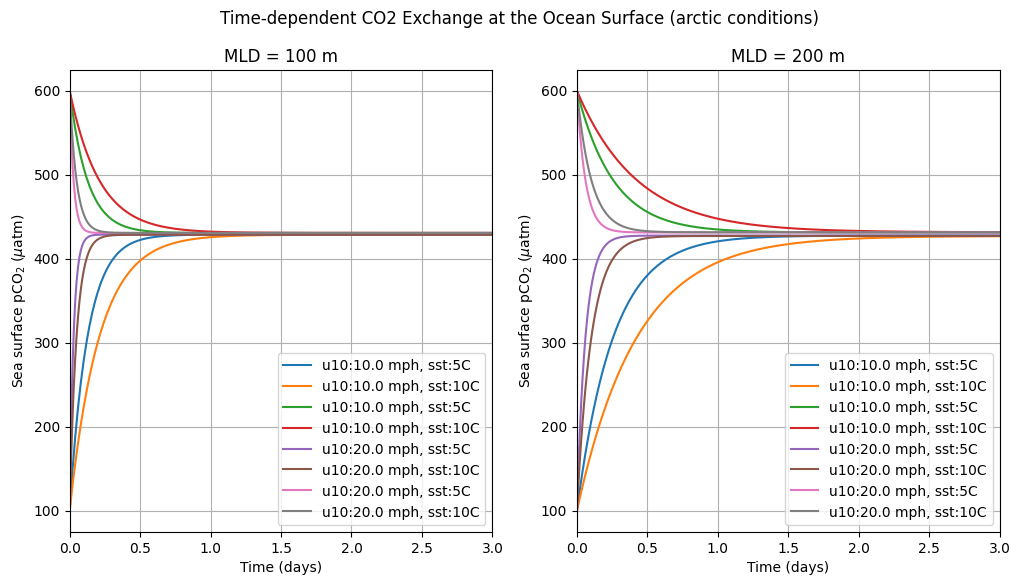

In [55]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

for i in np.arange(0,len(t_c_out)):
    if mld_c_out[i] == 100 :
        ax[0].plot(t_c_out[i]/86400, pCO2_sea_c_out[i], label='u10:'+str(u10_c_out[i]/160934.4)+' mph, sst:'+str(sst_c_out[i])+'C')
    else:
        ax[1].plot(t_c_out[i]/86400, pCO2_sea_c_out[i], label='u10:'+str(u10_c_out[i]/160934.4)+' mph, sst:'+str(sst_c_out[i])+'C')
        
ax[0].set_xlabel("Time (days)")
ax[0].set_ylabel("Sea surface pCO$_2$ ($\mu$atm)")
ax[0].set_title("MLD = 100 m")
ax[0].legend()
ax[0].grid(True)
ax[0].set_xlim(0,3)

ax[1].set_xlabel("Time (days)")
ax[1].set_ylabel("Sea surface pCO$_2$ ($\mu$atm)")
ax[1].set_title("MLD = 200 m")
ax[1].legend()
ax[1].grid(True)
ax[1].set_xlim(0,3)

fig.suptitle('Time-dependent CO2 Exchange at the Ocean Surface (arctic conditions)')

# Expect CO2 in the surface ocean to equilibrate over days to weeks ex. warm, salty tropical ocean with low winds - weeks; vs. windy cold, fresher arctic - days 

## Observation-data product comparison results:

### Animation 1. Fluxes of MPIS and LDEO data products over time

C:\Users\annar\AppData\Local\Temp\ipykernel_19124\886869783.py:25: UserWarning: Adding colorbar to a different Figure <Figure size 1400x800 with 4 Axes> than <Figure size 1400x800 with 3 Axes> which fig.colorbar is called on.
  cb = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.3)
C:\Users\annar\OneDrive\Documents\GitHub\python3-crlx\.venv\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


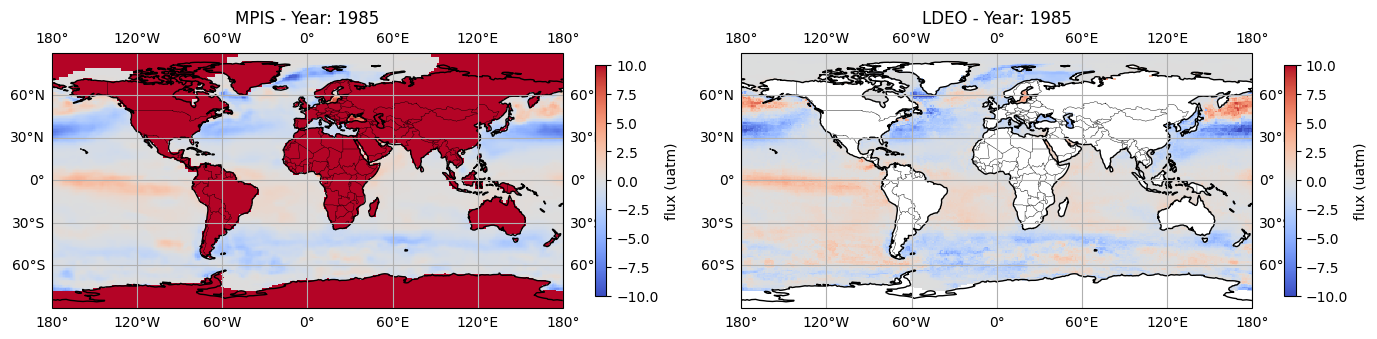

In [102]:
# set up fluxes to plot
ds = diff_obs_fluxes
lon = ds.lon
lat = ds.lat
years = np.arange(1985,2022)
time = np.arange(0,len(years))

data = diff_obs_fluxes.flux_difference

# Compute edges
lat_edges = np.linspace(lat[0] - 0.5*(lat[1]-lat[0]), lat[-1] + 0.5*(lat[1]-lat[0]), len(lat)+1)
lon_edges = np.linspace(lon[0] - 0.5*(lon[1]-lon[0]), lon[-1] + 0.5*(lon[1]-lon[0]), len(lon)+1)

# Create figure with two map subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8),
                         subplot_kw={'projection': ccrs.PlateCarree()})

meshes = []
titles = []

for i, ax in enumerate(axes):
    if i == 0:
        data = mpis_flux
        title = ax.set_title(f"MPIS - Year: {years[0]}")
        cb = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.3)
        cb.set_label("flux (uatm)")
        
    else:
        data = ldeo_flux
        title = ax.set_title(f"LDEO - Year: {years[0]}")
        cb = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.3)
        cb.set_label("flux (uatm)")
    
    ax.set_global()
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidth=0.3)
    ax.gridlines(draw_labels=True)
    
    mesh = ax.pcolormesh(lon_edges, lat_edges, data.isel(time=0), cmap='coolwarm',
                         transform=ccrs.PlateCarree(), shading='auto', vmin=-10, vmax=10)
    
    meshes.append(mesh)
    titles.append(title)

# Update function for animation
def update(frame):
    for i in range(len(axes)):
        meshes[i].set_array(data.isel(time=frame).values.ravel())
        if i == 0:
            titles[i].set_text(f"MPIS - Year: {years[frame]}")
        else:
            titles[i].set_text(f"LDEO - Year: {years[frame]}")
    return meshes + titles

# Animate
ani_flux_separate = FuncAnimation(fig, update, frames=len(time), interval=500, blit=False)

plt.tight_layout()
plt.show()

In [103]:
ani_flux_separate.save('C:/Users/annar/OneDrive/Documents/GitHub/ATM_521/Final project/flux_separate_ani.gif', writer='pillow', fps=5)

### Animation 2. Flux difference between MPIS and LDEO over time

C:\Users\annar\OneDrive\Documents\GitHub\python3-crlx\.venv\lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


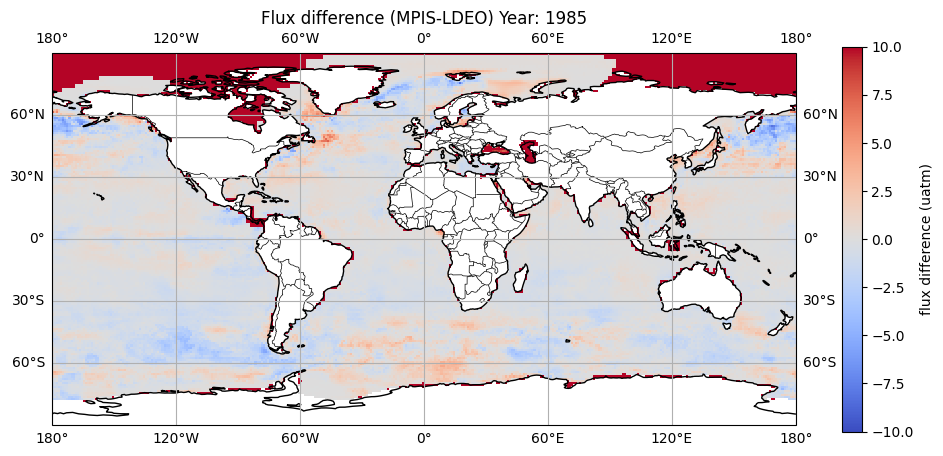

In [105]:
# Load data

ds = diff_obs_fluxes  # e.g., CO₂ flux, temperature
data = diff_obs_fluxes.flux_difference
#ds['time'] = xr.decode_cf(ds).time
data = data.sel(time=slice('1985-01', '2021-12'))
years = np.arange(1985,2022)

lat = diff_obs_fluxes.lat
lon = diff_obs_fluxes.lon

# Setup figure and Cartopy map
fig = plt.figure(figsize=(12, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True)

lat_edges = np.linspace(lat[0] - 0.5*(lat[1]-lat[0]), lat[-1] + 0.5*(lat[1]-lat[0]), len(lat)+1)
lon_edges = np.linspace(lon[0] - 0.5*(lon[1]-lon[0]), lon[-1] + 0.5*(lon[1]-lon[0]), len(lon)+1)

# Plot initial frame
mesh = ax.pcolormesh(lon_edges, lat_edges, data.isel(time=0), cmap='coolwarm', transform=ccrs.PlateCarree(), shading='auto', vmin=-10, vmax= 10)
cb = plt.colorbar(mesh, ax=ax, orientation='vertical')
cb.set_label("flux difference (uatm)")

title = ax.set_title(f"Flux difference (MPIS-LDEO) Year: {years[0]}")

# Animation update function
def update(frame):
    month_data = data.isel(time=frame)
    mesh.set_array(month_data.values.ravel())
    title.set_text(f"Flux difference (MPIS-LDEO) Year: {years[0]}")
    return mesh, title

# Create animation
ani_flux_diff = FuncAnimation(fig, update, frames=data.sizes['time'], interval=150, blit=False)

plt.show()

In [106]:
ani_flux_diff.save('C:/Users/annar/OneDrive/Documents/GitHub/ATM_521/Final project/flux_diff_ani.gif', writer='pillow', fps=5)

### Figure 3. Grid-correlation 

### Figure 4. Spatial bias

### Figure 5. Standard deviation ratio 

### Figure 6. Centered RMSE

### Figure 7. Histogram of all data 

### Figure 8. Histogram of seasons

# Conclusions:

## References:
Bennington, V., Galjanic, T., & McKinley, G. A. (2022). Explicit physical knowledge in machine learning for ocean carbon flux reconstruction: The pCO2-Residual method. Journal of Advances in Modeling Earth Systems, 14, e2021MS002960. https://doi. org/10.1029/2021MS002960

Fay, Amanda R., Gregor, L., Landschützer, P., McKinley, G., Gruber, N., Gehlen, M., Iida, Y., Laruelle, G., Rödenbeck, C., Roobaert, A., & Zeng, J. (2021). SeaFlux: harmonization of air–sea CO2 fluxes from surface pCO2 data products using a standardized approach. Earth System Science Data, 13, 4693-4710. https://doi.org/10.5194/essd-13-4693-2021  

Fay, A. R., Munro, D. R., McKinley, G. A., Pierrot, D., Sutherland, S. C., Sweeney, C., & Wanninkhof, R. (2024). Updated climatological mean ΔfCO2 and net sea–air CO2 flux over the global open ocean regions [Journal Article]. Earth System Science Data, 16(4). https://doi.org/https://doi.org/10.5194/essd-16-2123-2024  

Friedlingstein, P., O'sullivan, M., Jones, M. W., Andrew, R. M., Bakker, D. C., Hauck, J., Landschützer, P., Le Quéré, C., Luijkx, I. T., & Peters, G. P. (2023). Global carbon budget 2023. Earth System Science Data, 15(12), 5301-5369.  

Landschützer, Peter; Laruelle, Goulven; Roobaert, Alizee; Regnier, Pierre (2020). A combined global ocean pCO2 climatology combining open ocean and coastal areas (NCEI Accession 0209633). [indicate subset used]. NOAA National Centers for Environmental Information. Dataset. doi: https://doi.org/10.25921/qb25-f418. Accessed [2020-04-08]. 

Laruelle, G. G., Landschützer, P., Gruber, N., Tison, J. L., Delille, B., & Regnier, P. (2017). Global high-resolution monthly pCO2 climatology for the coastal ocean derived from neural network interpolation. Biogeosciences, 14(19), 4545–4561. https://doi.org/10.5194/bg-14-4545-2017  

Shi, H., Chen, Y., & Gao, H. (2024). Spatiotemporal evolution of air-sea CO2 flux in the Northwest Pacific and its response to ENSO [Original Research]. Frontiers in Marine Science, 11. https://doi.org/10.3389/fmars.2024.1461012  

Takahashi, T., Sutherland, S. C., Wanninkhof, R., Sweeney, C., Feely, R. A., Chipman, D. W., Hales, B., Friederich, G., Chavez, F., Sabine, C., Watson, A., Bakker, D. C. E., Schuster, U., Metzl, N., Yoshikawa-Inoue, H., Ishii, M., Midorikawa, T., Nojiri, Y., Körtzinger, A.,…de Baar, H. J. W. (2009). Climatological mean and decadal change in surface ocean pCO2, and net sea–air CO2 flux over the global oceans. Deep Sea Research Part II: Topical Studies in Oceanography, 56(8), 554-577. https://doi.org/https://doi.org/10.1016/j.dsr2.2008.12.009  

Valsala, V., Maksyutov, S., Telszewski, M., Nakaoka, S., Nojiri, Y., Ikeda, M., & Murtugudde, R. (2012). Climate impacts on the structures of the North Pacific air-sea CO<sub>2</sub> flux variability. Biogeosciences, 9(1), 477-492. https://doi.org/10.5194/bg-9-477-2012  

Wanninkhof, R. (1992). Relationship between wind speed and gas exchange over the ocean. Journal of Geophysical Research: Oceans, 97(C5), 7373-7382. https://doi.org/https://doi.org/10.1029/92JC00188  

Weiss, R. F. (1974). Carbon dioxide in water and seawater: the solubility of a non-ideal gas. Marine Chemistry, 2(3), 203-215. https://doi.org/https://doi.org/10.1016/0304-4203(74)90015-2 
